In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova
Current folders are:
prova.0


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
retrieveFirmBalancesheet(0,0)

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,150.210482,31.2,-119.010482,31.2,9.117765,24.0,126.210482,0.000000,0.0,80.0,93.633333,78.027778,1.0
1,0.0,31.2,173.633333,80.6,-124.233333,49.4,14.536188,38.0,135.633333,0.000000,0.0,80.0,92.983102,0.000000,1.0
2,0.0,80.6,172.983102,148.2,-105.383102,67.6,19.936008,52.0,120.983102,0.000000,0.0,80.0,92.337386,0.000000,1.0
3,0.0,148.2,172.337386,239.2,-81.337386,91.0,26.655801,70.0,102.337386,0.000000,0.0,80.0,91.696154,0.000000,1.0
4,0.0,239.2,171.696154,371.8,-39.096154,132.6,39.000532,102.0,69.696154,0.000000,0.0,80.0,91.059375,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,10270.0,135.633333,10423.4,17.766667,153.4,44.590979,118.0,17.633333,0.000000,0.0,62.0,73.633333,61.361111,1.0
96,0.0,10423.4,135.633333,10576.8,17.766667,153.4,44.590979,118.0,17.633333,0.000000,0.0,62.0,73.633333,61.361111,1.0
97,0.0,10576.8,135.633333,10605.4,-107.033333,28.6,42.133838,122.0,13.633333,37.066033,100.0,62.0,75.450000,62.875000,1.0
98,0.0,10605.4,137.450000,10748.4,5.550000,143.0,41.466584,110.0,27.450000,0.000000,0.0,62.0,76.358333,63.631944,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,215.0,0.000000,3600.944726,822.116667,-2778.828059,822.116667,259.842166,732.416667,2868.528059,31.302512,79.583333,2067.0,2543.301031,1802.059723,10.0
1,215.0,822.116667,4610.301031,2445.691667,-2986.726031,1623.575000,520.762498,1370.750000,3239.551031,32.957655,81.833333,2067.0,2722.569727,1304.314255,10.0
2,215.0,2445.691667,4789.569727,4536.866667,-2698.394727,2091.175000,706.640759,1860.250000,2929.319727,82.132610,205.000000,2067.0,2746.094419,1131.811972,10.0
3,215.0,4536.866667,4813.094419,6944.158333,-2405.802752,2407.291667,819.810246,2165.250000,2647.844419,106.978628,262.833333,2067.0,2785.087457,1077.827218,10.0
4,215.0,6944.158333,4852.087457,9837.300000,-1958.945790,2893.141667,942.369558,2467.583333,2384.504123,72.019542,183.000000,2067.0,2790.547012,1050.356179,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,215.0,403946.983333,5640.964476,408294.941667,-1293.006143,4347.958333,1611.765459,4318.833333,1322.131143,340.436752,838.416667,3098.0,2508.262679,996.797353,10.0
96,215.0,408294.941667,5606.262679,412130.375000,-1770.829346,3835.433333,1593.615799,4310.166667,1296.096013,496.440423,1226.500000,3070.0,2501.941257,1095.732990,10.0
97,215.0,412130.375000,5571.941257,416492.483333,-1209.832924,4362.108333,1605.262734,4179.083333,1392.857924,266.264705,685.833333,3070.0,2498.908449,1052.961723,10.0
98,215.0,416492.483333,5568.908449,420754.825000,-1306.566783,4262.341667,1572.158838,4178.500000,1390.408449,306.374126,772.250000,3067.0,2495.679139,1002.841838,10.0


In [10]:
allFirmData.__description__

'all firms'

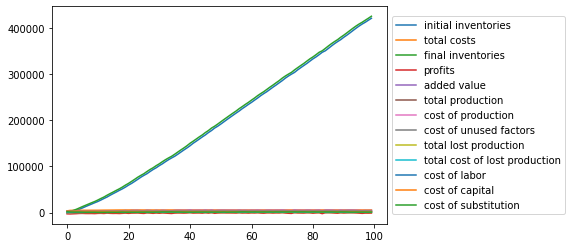

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

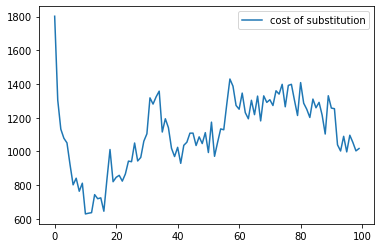

In [12]:
allFirmData[['cost of substitution']].plot()

<AxesSubplot: >

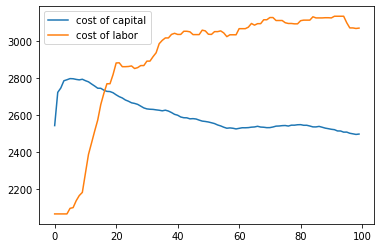

In [13]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [14]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [15]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 10 firms


In [16]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [17]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,1308.969707,234.0,-1074.969707,234.0,68.998710,202.0,1106.969707,8.007402,22.0,688.0,765.803227,428.770833,10.0
1,0.0,234.0,1453.803227,678.6,-1009.203227,444.6,132.062308,358.0,1095.803227,6.170937,16.0,688.0,787.614620,330.987866,10.0
2,0.0,678.6,1475.614620,1318.2,-836.014620,639.6,193.872093,532.0,943.614620,14.863269,40.0,688.0,792.996915,277.229077,10.0
3,0.0,1318.2,1480.996915,2181.4,-617.796915,863.2,250.246973,664.0,816.996915,0.000000,0.0,688.0,792.784791,202.403663,10.0
4,0.0,2181.4,1480.784791,3294.2,-367.984791,1112.8,329.720467,878.0,602.784791,5.435786,22.0,688.0,789.348198,248.262895,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,112996.0,1379.726071,114220.6,-155.126071,1224.6,373.723960,1062.0,317.726071,44.690475,120.0,657.0,704.283952,295.884129,10.0
96,0.0,114220.6,1361.283952,115299.6,-282.283952,1079.0,384.982670,1062.0,299.283952,83.215810,232.0,657.0,702.284851,347.011191,10.0
97,0.0,115299.6,1359.284851,116295.4,-363.484851,995.8,378.627634,1050.0,309.284851,101.410043,284.0,657.0,704.776254,288.646412,10.0
98,0.0,116295.4,1361.776254,117361.4,-295.776254,1066.0,364.816965,1048.0,313.776254,87.408530,228.0,657.0,705.924678,182.916040,10.0


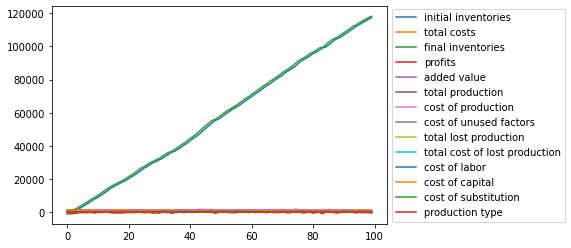

In [18]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

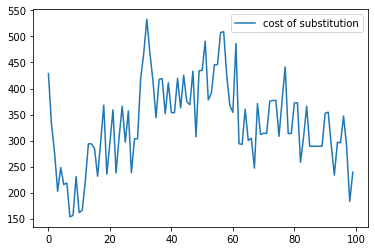

In [19]:
sumOfBalanceSheetSubset[['cost of substitution']].plot()

<AxesSubplot: >

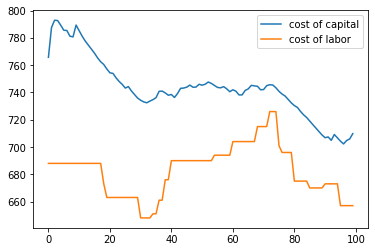

In [20]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [21]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000,822.116667,822.116667
1,822.116667,1623.575000,2445.691667
2,2445.691667,2091.175000,4536.866667
3,4536.866667,2407.291667,6944.158333
4,6944.158333,2893.141667,9837.300000
...,...,...,...
95,403946.983333,4347.958333,408294.941667
96,408294.941667,3835.433333,412130.375000
97,412130.375000,4362.108333,416492.483333
98,416492.483333,4262.341667,420754.825000
